# Project 5

In [2]:
!%pip install networkx matplotlib

# Import necessary libraries for network analysis and visualization
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import zipfile
import requests
import tempfile
import os
import numpy as np
from io import BytesIO
import random
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import seaborn as sns
from scipy import stats
import networkit as nk
import powerlaw
import collections
from scipy.stats import ks_2samp, poisson

'%pip' is not recognized as an internal or external command,
operable program or batch file.


[[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0]
 [1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0]
 [0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1]
 [0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 1]
 [0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0]
 [0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0]
 [0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0]
 [0 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1]
 [0 0 0 0 1 1 0 1 1 0 0 1 1 1 0 1 0 0 0 0 1 0 

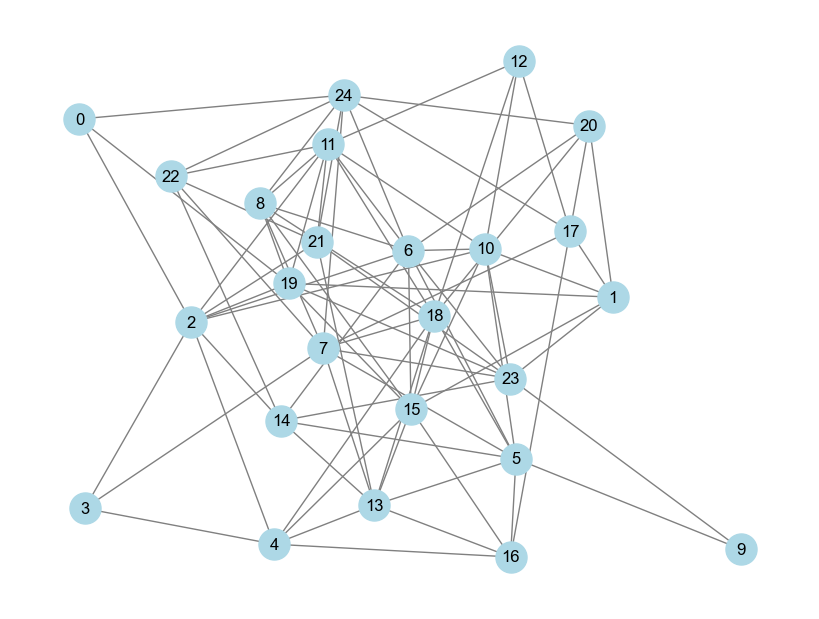

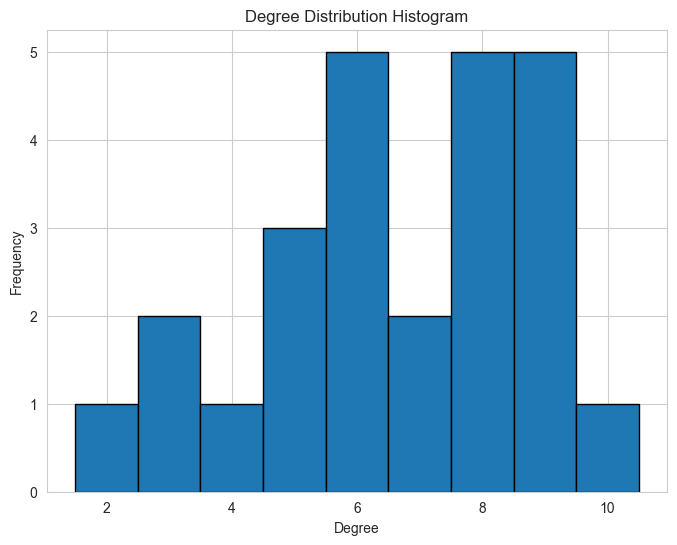

Expected degree: 7.5


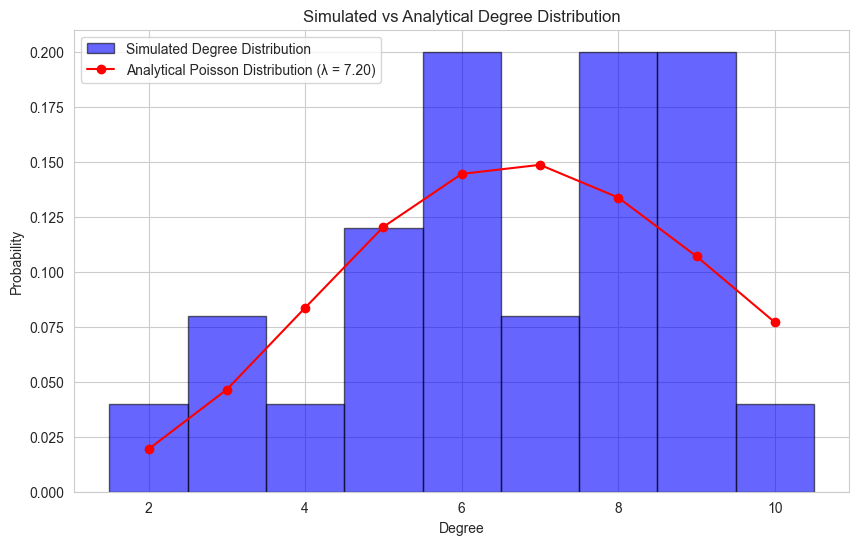

In [3]:
# Exercise 1 - TODO
# Exercise 2: Erdős–Rényi Graph Analysis

def er_graph_adjacency_matrix(N, p):
    """Generate an Erdős–Rényi random graph and return its adjacency matrix."""
    G = nx.erdos_renyi_graph(N, p)
    adjacency_matrix = nx.to_numpy_array(G, dtype=int)
    return adjacency_matrix

# Generate and visualize example graph
N = 25
p = 0.3
m = er_graph_adjacency_matrix(N, p)
print(m)

def draw_graph_from_adjacency_matrix(adjacency_matrix):
    """Visualize a graph from its adjacency matrix."""
    G = nx.from_numpy_array(adjacency_matrix)
    plt.figure(figsize=(8, 6))
    nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=12)
    plt.show()

draw_graph_from_adjacency_matrix(m)

def draw_degree_distribution_histogram(adjacency_matrix):
    """Plot histogram of degree distribution."""
    G = nx.from_numpy_array(adjacency_matrix)
    degrees = [degree for _, degree in G.degree()]
    plt.figure(figsize=(8, 6))
    plt.hist(degrees, bins=range(min(degrees), max(degrees) + 2), align='left', edgecolor='black')
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.title("Degree Distribution Histogram")
    plt.show()

draw_degree_distribution_histogram(m)

# Calculate expected degree
print(f"Expected degree: {N * p}")

# Compare simulated vs analytical Poisson distribution
G = nx.from_numpy_array(m)
degrees = [degree for _, degree in G.degree()]
lambda_ = p * (N - 1)
degree_values = range(min(degrees), max(degrees) + 1)
poisson_pmf = [poisson.pmf(k, lambda_) * N for k in degree_values]

# Plotting comparison
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=range(min(degrees), max(degrees) + 2), align='left', density=True, 
         alpha=0.6, color='blue', edgecolor='black', label="Simulated Degree Distribution")
plt.plot(degree_values, poisson.pmf(degree_values, lambda_), 'o-', color='red', 
         label=f"Analytical Poisson Distribution (λ = {lambda_:.2f})")
plt.xlabel("Degree")
plt.ylabel("Probability")
plt.title("Simulated vs Analytical Degree Distribution")
plt.legend()
plt.grid(True)
plt.show()

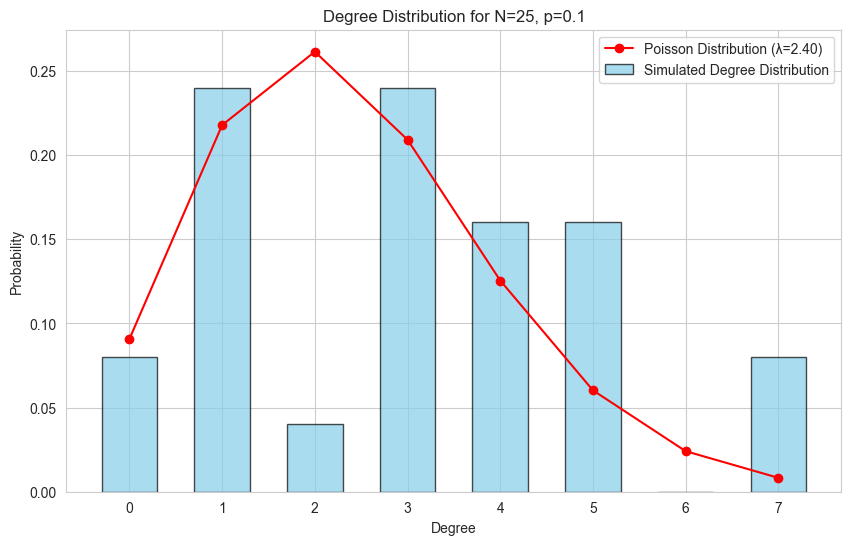

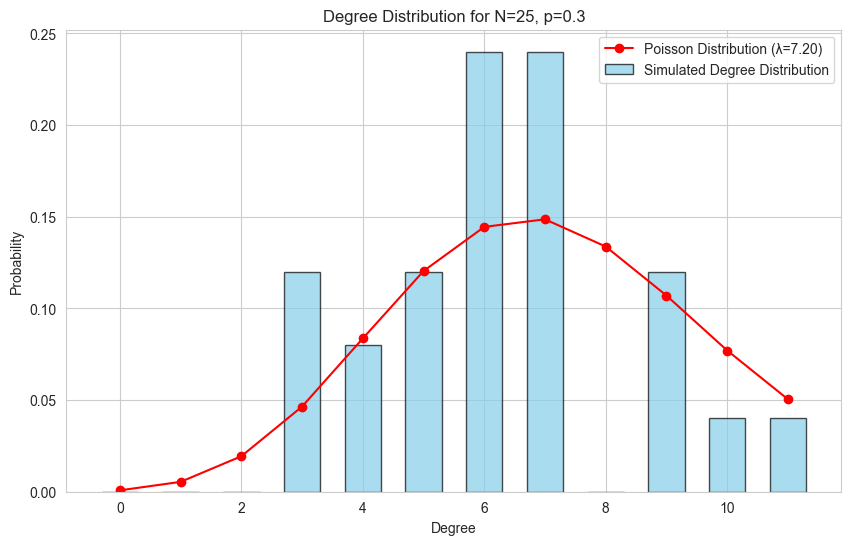

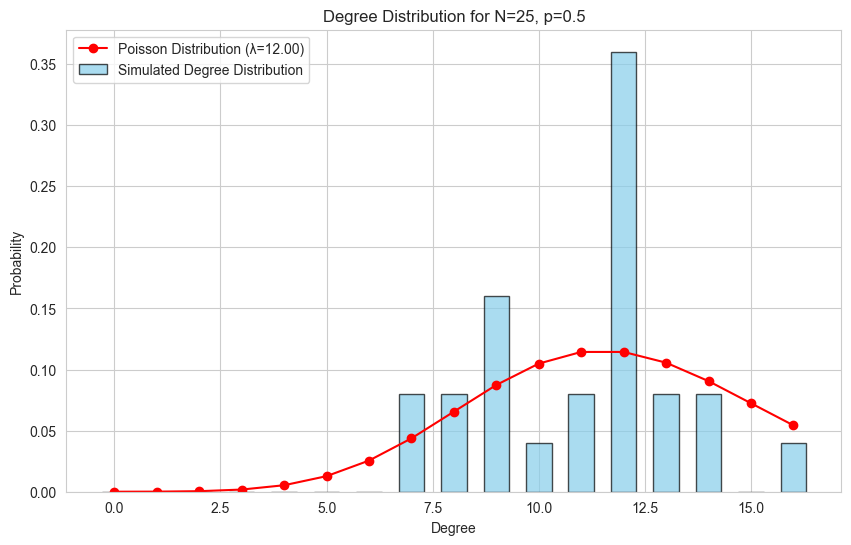

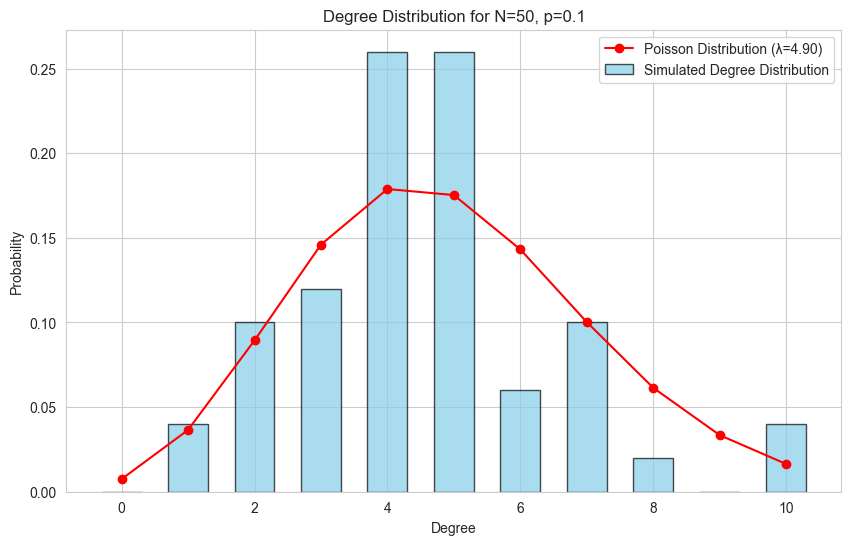

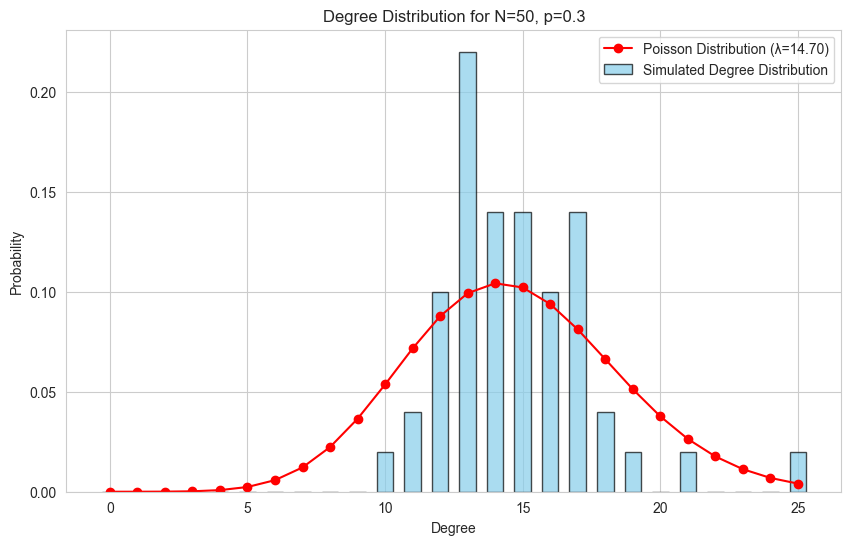

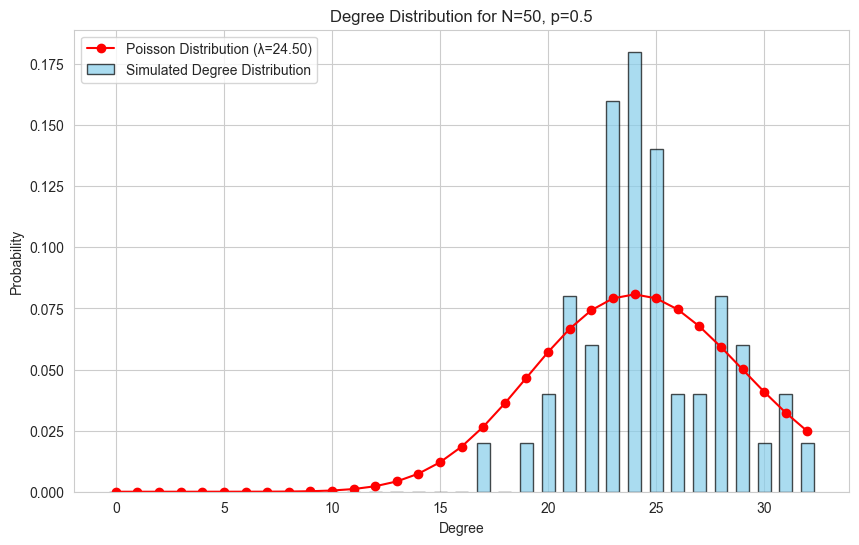

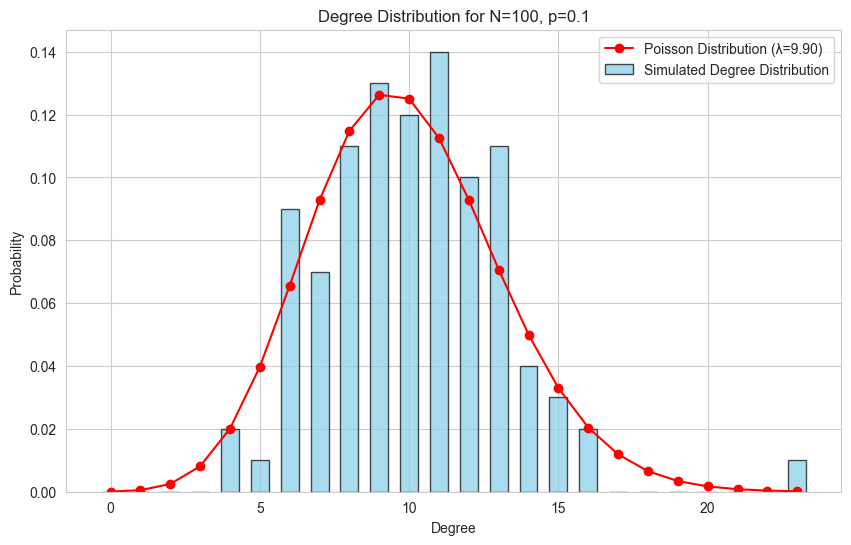

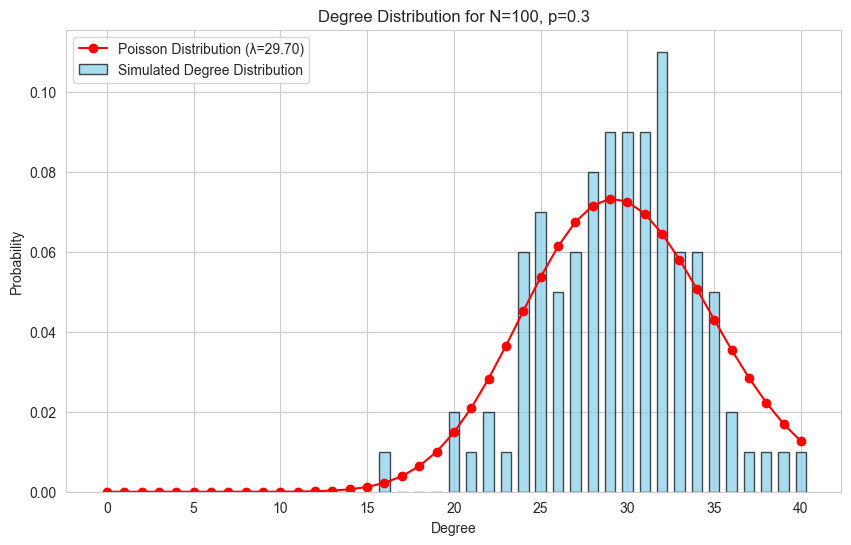

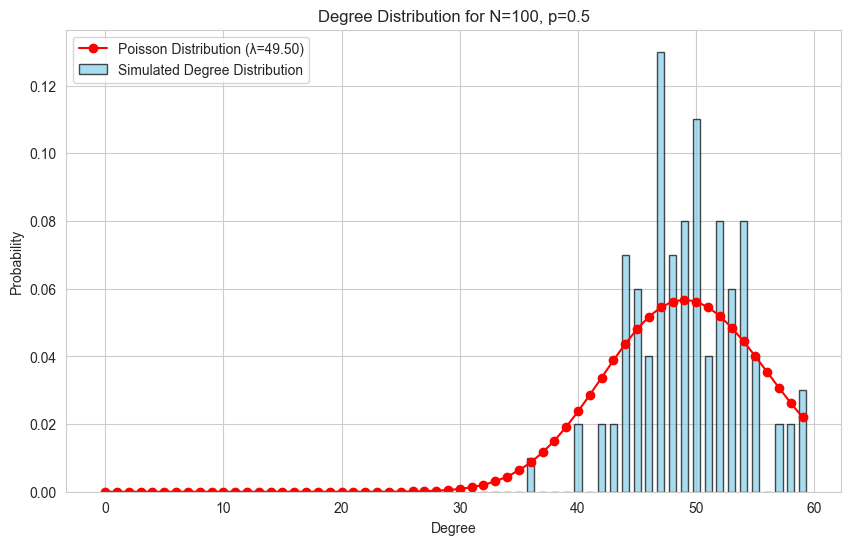

In [4]:
def plot_degree_distribution(N, p):
    """Plot simulated vs analytical degree distribution for ER graphs."""
    adjacency_matrix = er_graph_adjacency_matrix(N, p)
    G = nx.from_numpy_array(adjacency_matrix)
    degrees = [degree for _, degree in G.degree()]
    lambda_ = p * (N - 1)
    
    # Calculate simulated degree distribution
    degree_counts = np.bincount(degrees)
    degree_probabilities = degree_counts / sum(degree_counts)
    degree_values = np.arange(len(degree_probabilities))
    
    # Calculate analytical Poisson distribution
    poisson_probs = [poisson.pmf(k, lambda_) for k in degree_values]
    
    # Create visualization
    plt.figure(figsize=(10, 6))
    plt.bar(degree_values, degree_probabilities, width=0.6, alpha=0.7, 
            label='Simulated Degree Distribution', color='skyblue', edgecolor='black')
    plt.plot(degree_values, poisson_probs, 'o-', color='red', 
             label=f'Poisson Distribution (λ={lambda_:.2f})')
    plt.xlabel('Degree')
    plt.ylabel('Probability')
    plt.title(f'Degree Distribution for N={N}, p={p}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Test with varying parameters
N_values = [25, 50, 100]
p_values = [0.1, 0.3, 0.5]

for N in N_values:
    for p in p_values:
        plot_degree_distribution(N, p)

Ex1 - paper


P5.2 Check the above analytical result by simulation. [1P]

Simulated Average Clustering Coefficient: 0.009829459896189819
Expected Clustering Coefficient (p): 0.01


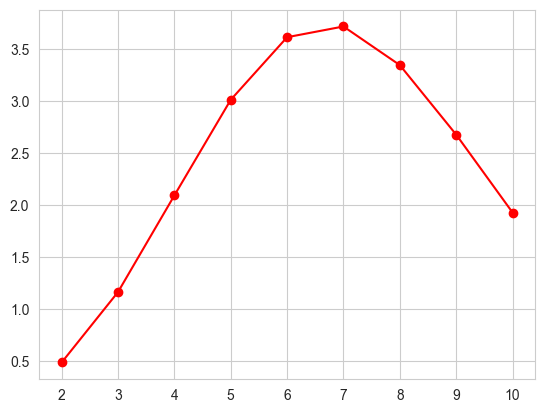

In [5]:
N = 1000
p = 0.01

def clustering_coefficient_simulation(N, p, num_trials=100):
    """Simulate average clustering coefficient for ER graphs."""
    clustering_coeffs = []
    for _ in range(num_trials):
        G = nx.erdos_renyi_graph(N, p)
        clustering_coeff = nx.average_clustering(G)
        clustering_coeffs.append(clustering_coeff)
    
    avg_clustering = np.mean(clustering_coeffs)
    return avg_clustering

simulated_clustering = clustering_coefficient_simulation(N, p)
print(f"Simulated Average Clustering Coefficient: {simulated_clustering}")
print(f"Expected Clustering Coefficient (p): {p}")

# Plotting
plt.plot(degree_values, poisson_pmf, 'o-', color='red', label=f"Analytical Poisson Distribution (λ = {lambda_:.2f})")
plt.show()

P5.3 Generate and draw a graph consisting of 4 community each with N= 20 nodes and the probability of connection within the community higher than between them. Draw the result. How it depends on the parameter values? [2P]

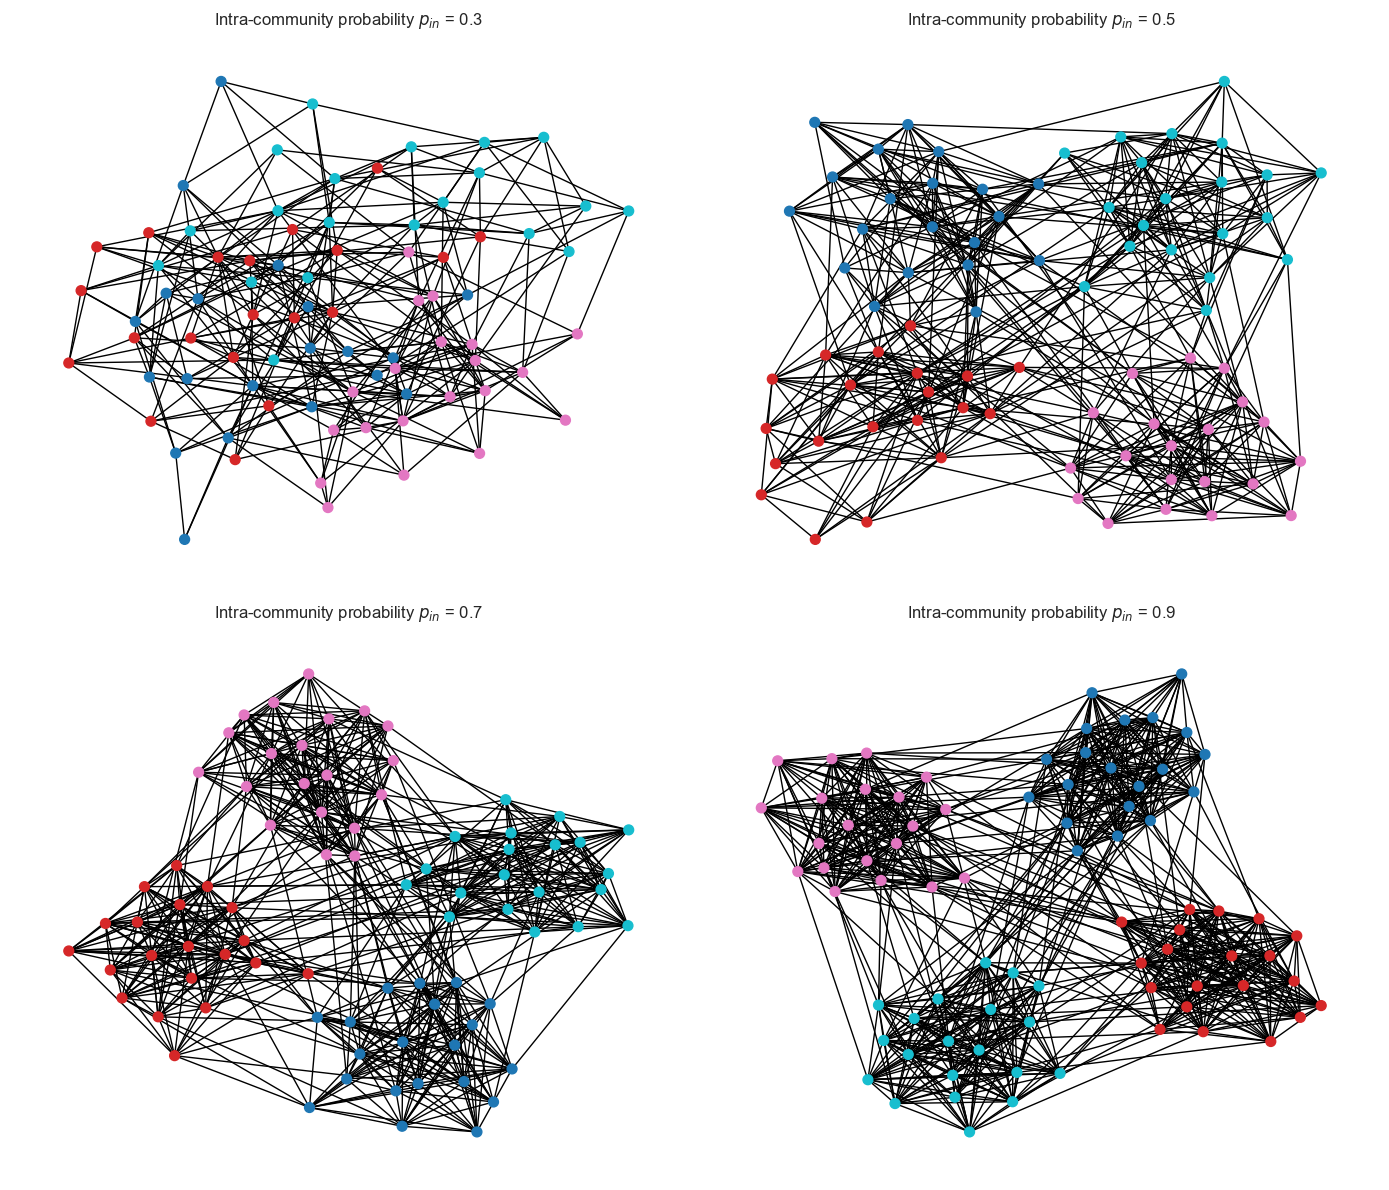

In [6]:
N = 20
num_communities = 4
p_in_values = [0.3, 0.5, 0.7, 0.9]
p_out = 0.05  # Probability of connections between communities

fig, axs = plt.subplots(2, 2, figsize=(14, 12))

for idx, p_in in enumerate(p_in_values):
    sizes = [N] * num_communities
    probs = [[p_in if i == j else p_out for j in range(num_communities)] for i in range(num_communities)]
    G = nx.stochastic_block_model(sizes, probs)
    
    ax = axs[idx // 2, idx % 2]
    color_map = [i // N for i in range(N * num_communities)]
    nx.draw(G, ax=ax, node_color=color_map, with_labels=False, node_size=50, cmap=plt.cm.tab10)
    ax.set_title(f"Intra-community probability $p_{{in}}$ = {p_in}")

plt.tight_layout()
plt.show()

P5.4 Draw a graph of the averaged coefficient of clustering of the WS network against its parameter p. [1.5P]

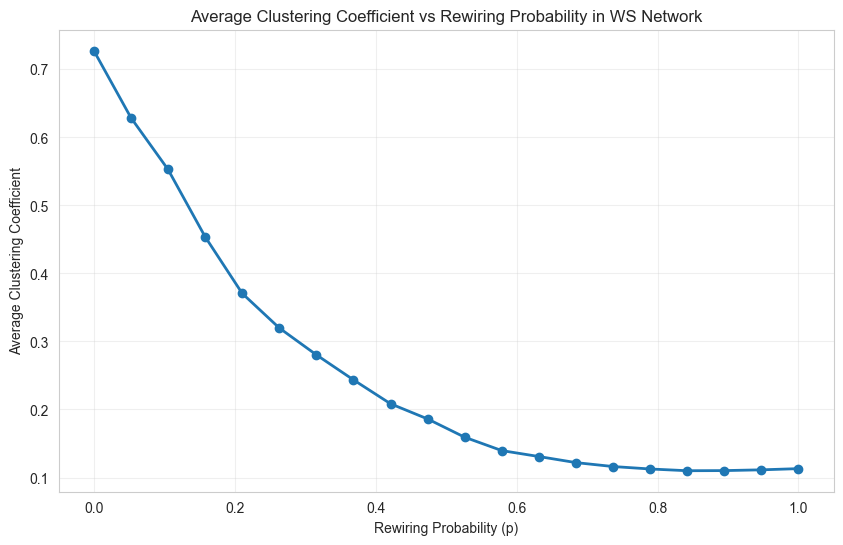

In [7]:
# Analysis of Watts-Strogatz network clustering coefficient
N = 300  
k = 35
p_values = np.linspace(0, 1, 20)
clustering_coeffs = []

for p in p_values:
    G = nx.watts_strogatz_graph(N, k, p)
    clustering_coeff = nx.average_clustering(G)
    clustering_coeffs.append(clustering_coeff)

plt.figure(figsize=(10, 6))
plt.plot(p_values, clustering_coeffs, marker='o', linewidth=2, markersize=6)
plt.title("Average Clustering Coefficient vs Rewiring Probability in WS Network")
plt.xlabel("Rewiring Probability (p)")
plt.ylabel("Average Clustering Coefficient")
plt.grid(True, alpha=0.3)
plt.show()

P5.5 With (or without) Mathematica solve ER model in the case of GN,E. [2P]

P5.6 Implement configuration model and test when the procedure converge. [2.5P]

In [8]:
def generate_degree_sequence(n, exponent):
    """Generate degree sequence using Zipf distribution."""
    sequence = np.random.zipf(exponent, n)
    if sum(sequence) % 2 != 0:
        sequence[0] += 1
    return sequence

def generate_degree_sequence_poisson(n, lambda_):
    """Generate degree sequence using Poisson distribution."""
    sequence = np.random.poisson(lambda_, n)
    if sum(sequence) % 2 != 0:
        sequence[0] += 1
    return sequence

def configuration_model(degree_sequence):
    """Generate a graph using configuration model from degree sequence."""
    G = nx.MultiGraph()
    degree_sequence = np.array(degree_sequence)
    for i, degree in enumerate(degree_sequence):
        G.add_node(i)

    iter = 0
    while any(degree_sequence > 0):
        # Randomly select two nodes with remaining degrees
        i = np.random.choice(np.where(degree_sequence > 0)[0])
        degree_sequence[i] -= 1
        j = np.random.choice(np.where(degree_sequence > 0)[0])
        degree_sequence[j] -= 1
        G.add_edge(i, j)
        iter += 1
        if iter > 1000:
            print("Max iterations reached")
            break
    
    # Remove self-loops and convert to simple graph
    G.remove_edges_from(nx.selfloop_edges(G))
    return nx.Graph(G)

# Example with Zipf distribution
n = 1000  
exponent = 2.5 
degree_sequence = generate_degree_sequence(n, exponent)

G = configuration_model(degree_sequence)
G.remove_edges_from(nx.selfloop_edges(G))

degrees_generated = [d for n, d in G.degree()]

In [9]:
n = 1000  
exponent = 2.5 
n = [(100, 2.5), (100, 3.5), (100, 4.5), (100, 5.5),
     (1000, 2.5), (1000, 3.5), (1000, 4.5), (1000, 5.5),
     (10000, 2.5), (10000, 3.5), (10000, 4.5), (10000, 5.5)]
for n, exponent in n:
    print(f"n = {n}, exponent = {exponent}")
    G = configuration_model(generate_degree_sequence(n, exponent))


for n, lambda_ in [(100, 2.5), (100, 3.5), (100, 4.5), (100, 5.5),
                   (1000, 2.5), (1000, 3.5), (1000, 4.5), (1000, 5.5),
                   (10000, 2.5), (10000, 3.5), (10000, 4.5), (10000, 5.5)]:
    print(f"n = {n}, lambda = {lambda_}")
    G = configuration_model(generate_degree_sequence_poisson(n, lambda_))





n = 100, exponent = 2.5
n = 100, exponent = 3.5
n = 100, exponent = 4.5
n = 100, exponent = 5.5
n = 1000, exponent = 2.5
n = 1000, exponent = 3.5
n = 1000, exponent = 4.5
n = 1000, exponent = 5.5
n = 10000, exponent = 2.5
Max iterations reached
n = 10000, exponent = 3.5
Max iterations reached
n = 10000, exponent = 4.5
Max iterations reached
n = 10000, exponent = 5.5
Max iterations reached
n = 100, lambda = 2.5
n = 100, lambda = 3.5
n = 100, lambda = 4.5
n = 100, lambda = 5.5
n = 1000, lambda = 2.5
Max iterations reached
n = 10000, exponent = 4.5
Max iterations reached
n = 10000, exponent = 5.5
Max iterations reached
n = 100, lambda = 2.5
n = 100, lambda = 3.5
n = 100, lambda = 4.5
n = 100, lambda = 5.5
n = 1000, lambda = 2.5
Max iterations reached
n = 1000, lambda = 3.5
Max iterations reached
n = 1000, lambda = 4.5
Max iterations reached
n = 1000, lambda = 5.5
Max iterations reached
n = 10000, lambda = 2.5
Max iterations reached
n = 10000, lambda = 3.5
Max iterations reached
n = 1000, 